In [1]:
#Refrence material 

https://www.coursera.org/learn/unsupervised-learning-recommenders-reinforcement-learning/programming/Rqh9M/anomaly-detection/lab?path=%2Fnotebooks%2FC3_W1_Anomaly_Detection.ipynb

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('final_train_data.csv')

In [4]:
df.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
df=df.drop(['id','Product ID','Machine failure'], axis=1)

In [6]:
df.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [7]:
df['Type'] = df['Type'].replace({'H':0,'M':1,'L':2})

In [8]:
df.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,2,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,1,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,2,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,2,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,1,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [9]:
df.shape  #We have 11 features

(132133, 11)

In [10]:
df=df.drop(['Type'], axis=1)

In [11]:
df.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [12]:
df['TWF'].value_counts()

0    132133
Name: TWF, dtype: int64

In [13]:
# df.sample(30000,random_state=1)  #Taking random 30k values

In [14]:
#converting dataframe to array

In [15]:
x = df.to_numpy()

In [16]:
x.shape

(132133, 10)

In [17]:
def estimate_gaussian(X):
#     X -> (m,n) array -> m =examples and n=attributes
#     returns : mu -> mean and var -> variance ; (n dimensional arrays) -> (n,)
    #code:
    
    m,n=X.shape
    mu_=(1/m)*np.sum(X,axis=0)
    mu=mu_.T
    var_=np.sum(((X-mu)**2),axis=0)/m
    var=var_.T
    
    return mu,var
        
        


In [18]:
mu,var=estimate_gaussian(x)

In [19]:
mu.shape

(10,)

In [20]:
mu

array([2.99847440e+02, 3.09936064e+02, 1.52146350e+03, 4.01870549e+01,
       1.03936534e+02, 0.00000000e+00, 3.78406605e-05, 2.27043963e-05,
       3.02725284e-05, 2.24016710e-03])

In [21]:
var.shape

(10,)

In [22]:
var

array([3.44398299e+00, 1.92335262e+00, 1.82080950e+04, 6.90629176e+01,
       4.05841599e+03, 0.00000000e+00, 3.78392286e-05, 2.27038808e-05,
       3.02716120e-05, 2.23514876e-03])

In [23]:
# #Wrong function -> correct function present bellow
# #Multivariance gussian
# def multivariance_gussian(X,mu,var):
# #     X -> (m,n) array -> m =examples and n=attributes
# #     mu -> (ndarary,)
# #     var -> (ndarray,)
    
#     #code:
#     n_features=X.shape[1]
#     #constant = 1 / ((2 * np.pi) ** (n_features / 2) * np.sqrt(np.prod(var+(1e-10))))
#     constant=1
#     # Compute the exponent term of the Gaussian function
#     exponent = -np.sum(((X - mu) ** 2) / (var+(1e-10)), axis=1)
    
#     # Compute the probabilities for each sample
#     probabilities = constant * np.exp(exponent)
    
#     return probabilities
    

In [24]:
# constant = 1 / (1 * np.sqrt(np.prod(var+(1e-10))))   #This is wrong

In [25]:
# constant

In [26]:
# var

In [27]:
# multiple=[]
# for i in range(len(var)):
#     if var[i]==0:
#         multiple.append(10**(10))
#     else :
#         multiple.append((1/var[i]))
        
        

In [28]:
# multiple

In [29]:
# exponent = -((x - mu) ** 2) / (var+(1e-10))

In [30]:
# exponent.shape

In [31]:
# pow_term=np.exp(exponent)

In [32]:
# pow_term.shape

In [33]:
# arr=multiple*pow_term

In [34]:
# arr.shape

In [35]:
# result = np.prod(arr, axis=1)

In [36]:
# result.shape

In [37]:
#Multivariance gussian
def multivariance_gussian(X,mu,var):
#     X -> (m,n) array -> m =examples and n=attributes
#     mu -> (ndarary,)
#     var -> (ndarray,)
    
    #code:
    n_features=X.shape[1]
    #constant = 1 / ((2 * np.pi) ** (n_features / 2) * np.sqrt(np.prod(var+(1e-10))))
    #constant=1
    multiple=[]                      # array of 1/var basically
    for i in range(len(var)):
        if var[i]==0:
            multiple.append(10**(10))
        else :
            multiple.append((1/var[i]))
        
    # Compute the exponent term of the Gaussian function
    #exponent = -np.sum(((X - mu) ** 2) / (var+(1e-10)), axis=1)
    exponent = -((X - mu) ** 2) / (var+(1e-10))
    pow_term=np.exp(exponent)
    gaussian_array=multiple*pow_term
    
    
    # Compute the probabilities for each sample
    #probabilities = constant * np.exp(exponent)
    probabilities = np.prod(gaussian_array, axis=1)
    
    return probabilities
    

In [38]:
#Getting mean and variance of the dataset
mu,var=estimate_gaussian(x)

In [39]:
p=multivariance_gussian(x,mu,var)

In [40]:
p.shape

(132133,)

In [41]:
# #Selecting an epsilon for detecting threshold
# def select_threshold(y_val, p_val): 
#     """
#     Finds the best threshold to use for selecting outliers 
#     based on the results from a validation set (p_val) 
#     and the ground truth (y_val)
    
#     Args:
#         y_val (ndarray): Ground truth on validation set
#         p_val (ndarray): Results on validation set
        
#     Returns:
#         epsilon (float): Threshold chosen 
#         F1 (float):      F1 score by choosing epsilon as threshold
#     """ 

#     best_epsilon = 0
#     best_F1 = 0
#     F1 = 0
    
#     step_size = (max(p_val) - min(p_val)) / 1000
    
#     for epsilon in np.arange(min(p_val), max(p_val), step_size):
    
#         ### START CODE HERE ### 
#         predictions = (p_val < epsilon)
#         tp = np.sum((predictions == 1) & (y_val == 1))
#         fn = np.sum((predictions == 0) & (y_val == 1))
#         fp = np.sum((predictions == 1) & (y_val == 0))
#         prec = tp / (tp + fp)
#         rec = tp / (tp + fn)
#         F1 = 2 * prec * rec / (prec + rec)
        
        
#         ### END CODE HERE ### 
        
#         if F1 > best_F1:
#             best_F1 = F1
#             best_epsilon = epsilon
        
#     return best_epsilon, best_F1

In [119]:
#Selecting an epsilon for detecting threshold
def select_threshold(y_val, p_val): 
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 

    best_epsilon = 0
    best_F1 = 0
    F1 = 0
   
    step_size = (max(p_val) - min(p_val)) / 1000
    
    for epsilon in np.arange(min(p_val)+step_size*10, max(p_val), step_size):
    
        ### START CODE HERE ### 
        predictions = (p_val < epsilon)
        predictions = predictions.astype(int)
        tp = np.sum((predictions == 1) & (y_val == 1))
        fn = np.sum((predictions == 0) & (y_val == 1))
        fp = np.sum((predictions == 1) & (y_val == 0))
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        F1 = 2 * prec * rec / (prec + rec)
        
        
        ### END CODE HERE ### 
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1

In [120]:
df_cv=pd.read_csv('final_cv_data_.csv')

In [121]:
df_cv.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,90418,L49271,L,299.5,309.2,1399,47.4,20,0,0,0,0,0,0
1,103002,L53040,L,301.3,311.0,1497,45.5,84,0,0,0,0,0,0
2,9653,L54424,L,299.8,309.7,1472,42.3,193,0,0,0,0,0,0
3,106459,M16074,M,296.8,307.8,1419,47.3,0,0,0,0,0,0,0
4,133925,L50355,L,300.3,309.6,1488,39.7,82,0,0,0,0,0,0


In [122]:
df_cv['Machine failure'].value_counts()

0    1157
1    1139
Name: Machine failure, dtype: int64

In [123]:
y = df_cv['Machine failure']

In [124]:
y = y.to_numpy()

In [125]:
y.shape

(2296,)

In [126]:
df_cv=df_cv.drop(['id','Product ID','Machine failure','Type'], axis=1)

In [127]:
df_cv.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,299.5,309.2,1399,47.4,20,0,0,0,0,0
1,301.3,311.0,1497,45.5,84,0,0,0,0,0
2,299.8,309.7,1472,42.3,193,0,0,0,0,0
3,296.8,307.8,1419,47.3,0,0,0,0,0,0
4,300.3,309.6,1488,39.7,82,0,0,0,0,0


In [128]:
x_cv = df_cv.to_numpy()

In [129]:
x_cv.shape

(2296, 10)

In [130]:
# y->   ground truth labels array
# x_cv->cross validation dataset array

In [131]:
p_val=multivariance_gussian(x_cv,mu,var)

In [132]:
p_val.shape

(2296,)

In [133]:
p_val

array([1.34664494e+14, 8.90509787e+14, 5.72103930e+14, ...,
       0.00000000e+00, 1.56222056e+14, 0.00000000e+00])

In [134]:
best_epsilon, best_F1=select_threshold(y, p_val)

In [135]:
best_epsilon

42519346740183.18

In [136]:
outliers = p_val < best_epsilon

In [137]:
outliers =outliers.astype(int)

In [138]:
outliers.shape

(2296,)

In [139]:
#Counting the number of correct predictions :
count_correct=0
for i in range(len(outliers)):
    if outliers[i]==y[i]:
       count_correct=count_correct+1

In [140]:
print(count_correct)   #Correct Precictions

1807


In [141]:
y.shape    #Total Predictions

(2296,)

In [142]:
# Detected 1807 outoff 2296 cases correctly for cross validation set

In [150]:
1807/2296

0.787020905923345

In [143]:
c=0
for i in range(len(y)):
    if y[i]==1:
        c=c+1
    

In [144]:
print(c)

1139


In [145]:
# 1139 -> not working

In [146]:
#Counting when machine was faulty and was detected as faulty
count_faulty_correct=0
for i in range(len(outliers)):
    if outliers[i]==1 and y[i]==1:
        count_faulty_correct=count_faulty_correct+1

In [147]:
print(count_faulty_correct)   #Not working engines detected

1082


In [148]:
# Detected 1082 outoff 1139 not working engines correctly for cross validation set

In [151]:
1082/1139

0.9499561018437226

78.7% overall accuracy, and 94.99% accuracy for detecting faulty engines

In [166]:
#Plotting Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_train = confusion_matrix(y,outliers)

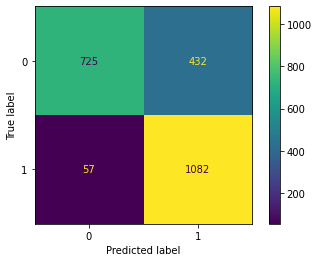

In [167]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot()
plt.show()

In [3]:
1082/(1082+57)*100

94.99561018437225

In [5]:
(725+1082)/(752+432+57+1082)*100

77.78734395178648